In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'/kaggle/input/house-price-prediction/train.csv')

# EDA

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
pd.set_option('display.max_rows', False)

In [6]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
                 ... 
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

# Data Cleaning

In [7]:
def encoder(data):
    encoder = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = encoder.fit_transform(data[col])

    return data

In [8]:
data = encoder(data)

In [9]:
data = data.ffill().bfill()

<Axes: >

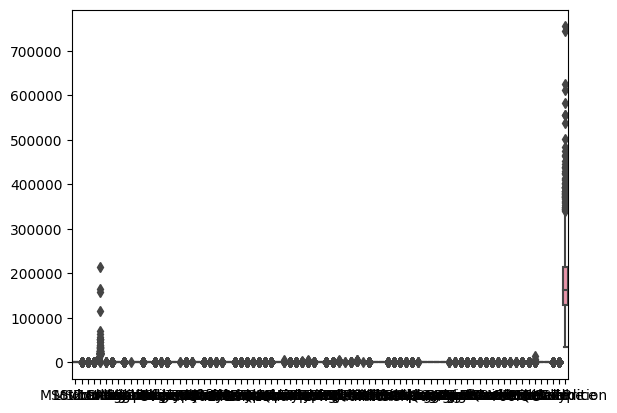

In [10]:
sns.boxplot(data)

In [11]:
def normalizer(data):
    data = pd.DataFrame(data)
    Q1 = data.quantile( 0.25)
    Q3 = data.quantile( 0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    for col in data.columns:
            data[col] = data[col].apply(
                lambda x: upper_bound[col] if x > upper_bound[col] else (lower_bound[col] if x < lower_bound[col] else x)
            )
        
    return data 

In [12]:
data = normalizer(data)

# Model Building

In [13]:
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = Ridge()
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],  # Ridge Regression üçün müxtəlif alpha dəyərləri
    'fit_intercept': [True, False]    # Bunu təyin edirik
              
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'En Ideal Parametrler:\n{best_params}')

En Ideal Parametrler:
{'alpha': 10, 'fit_intercept': True}


In [17]:
y_pred = best_model.predict(X_test_scaled)

# Error Metrics

In [18]:
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

In [19]:
print(f'MSE:\n{MSE}\nR2:\n{R2*100:.0f}%')

MSE:
475750964.5027818
R2:
90%


# Visualiation

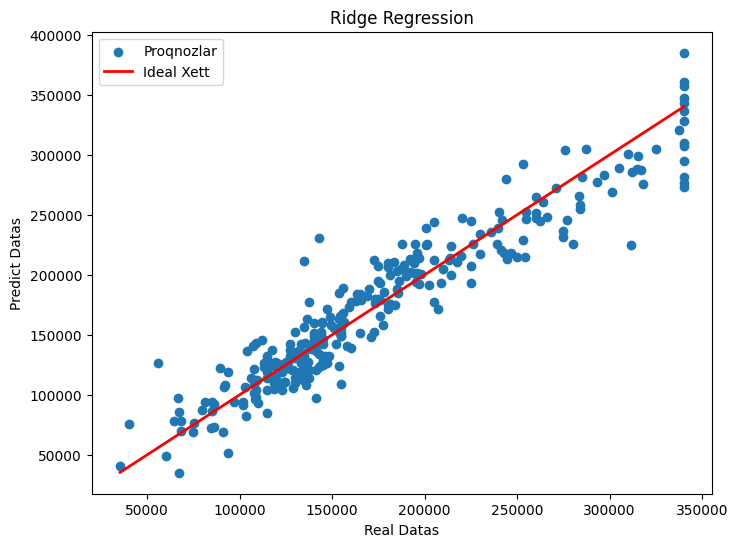

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, marker='o', label='Proqnozlar' )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='r', linestyle='-', linewidth=2, label='Ideal Xett')
plt.title('Ridge Regression')
plt.xlabel('Real Datas')
plt.ylabel('Predict Datas')
plt.legend()
plt.show()